In [1]:
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 25.0 MB 140 kB/s eta 0:00:01
     |████████████████████████████████| 30.6 MB 11 kB/s  eta 0:00:012


In [2]:
!python3 --version

Python 3.6.13 :: Anaconda, Inc.


In [3]:
!nvidia-smi

Thu Apr 21 13:27:46 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.103.01   Driver Version: 470.103.01   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:03:00.0  On |                  N/A |
|  0%   59C    P0    50W / 240W |    512MiB /  8111MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
!pip install scikit-image

     |████████████████████████████████| 12.4 MB 64 kB/s  eta 0:00:01
     |████████████████████████████████| 3.3 MB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 148 kB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 12.3 MB/s eta 0:00:01
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.3.1
    Uninstalling Pillow-8.3.1:
      Successfully uninstalled Pillow-8.3.1
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1


In [6]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [7]:
data_dir = "/home/jun/Github/MasterStudy/ComputerVision/data/Simplycity/"

In [8]:
impath= os.listdir(data_dir)

In [9]:
impath

['7', '4', '9', '0', '5', '2', '8', '3', '1', '6']

In [10]:
# Tao list images va list id
train_image_list=[]
train_id=[]
test_image_list=[]
test_id=[]
for path in impath:
    class_path = data_dir + "/" +path
    image_names= os.listdir(class_path)
    image_path=[]
    image_id=[]
    for image in image_names:
        image_path.append(class_path+'/'+ image)
        image_id.append(int(path))
   # Chon ngau nhien 60 anh lam train,40 anh moi class lam anh test
    y=np.arange(100)
    np.random.shuffle(y)
    train_image_list+= [image_path[i] for i in y[0:80]]
    test_image_list+=[image_path[i] for i in y[80:100]]
    train_id+=[image_id[i] for i in y[0:80]]
    test_id+=[image_id[i] for i in y[80:100]]

In [51]:
# Tinh SIFT cho cac anh trong tap training:
sift = cv2.xfeatures2d.SURF_create()
# sift = cv2.ORB_create()
All_sift=[]# list contain all SIFT vectors from all training images:
for image in train_image_list:
    img = cv2.imread(image)
    kp, des = sift.detectAndCompute(img, None)
    for d in des:
        All_sift.append(d)

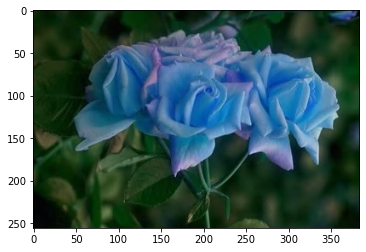

In [52]:
plt.imshow(img)
plt.show()

In [53]:
kp, des = sift.detectAndCompute(img, None)

In [54]:
des

array([[ 0.00139936,  0.00040814,  0.00169659, ..., -0.00027913,
         0.00055962,  0.0003036 ],
       [-0.00011305, -0.00133101,  0.00227196, ..., -0.00039953,
         0.00268171,  0.00195167],
       [-0.00017929, -0.00138033,  0.0022838 , ..., -0.00012713,
         0.00307424,  0.00316444],
       ...,
       [ 0.00124253, -0.00415658,  0.00344158, ..., -0.01272723,
         0.00660445,  0.0150949 ],
       [-0.00380778, -0.00165097,  0.00380778, ..., -0.00163015,
         0.00362752,  0.00315469],
       [-0.00053978, -0.00102719,  0.00966222, ..., -0.00376589,
         0.00753671,  0.00384903]], dtype=float32)

In [55]:
np.shape(des)

(582, 64)

In [56]:
##Thuc hien clustering tren SIFT-descriptors de tao codewords:
Number_code_words= 600
batch_size = 3000 # 3 * tong so anh=1000 
kmeans = MiniBatchKMeans(n_clusters=Number_code_words, batch_size=batch_size, verbose=1).fit(All_sift)

Init 1/3 with method: k-means++
Inertia for init 1/3: 701.845747
Init 2/3 with method: k-means++
Inertia for init 2/3: 704.607403
Init 3/3 with method: k-means++
Inertia for init 3/3: 699.581026
Minibatch iteration 1/21400: mean batch inertia: 0.086440, ewa inertia: 0.086440 
Minibatch iteration 2/21400: mean batch inertia: 0.085377, ewa inertia: 0.086430 
Minibatch iteration 3/21400: mean batch inertia: 0.084957, ewa inertia: 0.086416 
Minibatch iteration 4/21400: mean batch inertia: 0.083217, ewa inertia: 0.086386 
Minibatch iteration 5/21400: mean batch inertia: 0.082926, ewa inertia: 0.086354 
Minibatch iteration 6/21400: mean batch inertia: 0.082802, ewa inertia: 0.086321 
Minibatch iteration 7/21400: mean batch inertia: 0.084724, ewa inertia: 0.086306 
Minibatch iteration 8/21400: mean batch inertia: 0.084134, ewa inertia: 0.086285 
Minibatch iteration 9/21400: mean batch inertia: 0.083691, ewa inertia: 0.086261 
[MiniBatchKMeans] Reassigning 10 cluster centers.
Minibatch iterati

Minibatch iteration 97/21400: mean batch inertia: 0.079464, ewa inertia: 0.083135 
Minibatch iteration 98/21400: mean batch inertia: 0.078616, ewa inertia: 0.083092 
Minibatch iteration 99/21400: mean batch inertia: 0.081280, ewa inertia: 0.083076 
Minibatch iteration 100/21400: mean batch inertia: 0.081188, ewa inertia: 0.083058 
Minibatch iteration 101/21400: mean batch inertia: 0.080523, ewa inertia: 0.083034 
Minibatch iteration 102/21400: mean batch inertia: 0.080775, ewa inertia: 0.083013 
Minibatch iteration 103/21400: mean batch inertia: 0.080923, ewa inertia: 0.082993 
Minibatch iteration 104/21400: mean batch inertia: 0.080649, ewa inertia: 0.082971 
Minibatch iteration 105/21400: mean batch inertia: 0.079813, ewa inertia: 0.082942 
Minibatch iteration 106/21400: mean batch inertia: 0.079488, ewa inertia: 0.082909 
Minibatch iteration 107/21400: mean batch inertia: 0.080933, ewa inertia: 0.082891 
Minibatch iteration 108/21400: mean batch inertia: 0.080634, ewa inertia: 0.082

Minibatch iteration 196/21400: mean batch inertia: 0.080161, ewa inertia: 0.081298 
Minibatch iteration 197/21400: mean batch inertia: 0.080573, ewa inertia: 0.081291 
Minibatch iteration 198/21400: mean batch inertia: 0.080778, ewa inertia: 0.081286 
Minibatch iteration 199/21400: mean batch inertia: 0.079235, ewa inertia: 0.081267 
Minibatch iteration 200/21400: mean batch inertia: 0.080182, ewa inertia: 0.081257 
Minibatch iteration 201/21400: mean batch inertia: 0.080250, ewa inertia: 0.081247 
Minibatch iteration 202/21400: mean batch inertia: 0.081128, ewa inertia: 0.081246 
Minibatch iteration 203/21400: mean batch inertia: 0.080957, ewa inertia: 0.081243 
Minibatch iteration 204/21400: mean batch inertia: 0.078508, ewa inertia: 0.081218 
Minibatch iteration 205/21400: mean batch inertia: 0.079483, ewa inertia: 0.081202 
Minibatch iteration 206/21400: mean batch inertia: 0.080258, ewa inertia: 0.081193 
Minibatch iteration 207/21400: mean batch inertia: 0.080156, ewa inertia: 0.

Minibatch iteration 295/21400: mean batch inertia: 0.079748, ewa inertia: 0.080406 
Minibatch iteration 296/21400: mean batch inertia: 0.080588, ewa inertia: 0.080408 
Minibatch iteration 297/21400: mean batch inertia: 0.080368, ewa inertia: 0.080407 
Minibatch iteration 298/21400: mean batch inertia: 0.080497, ewa inertia: 0.080408 
Minibatch iteration 299/21400: mean batch inertia: 0.081177, ewa inertia: 0.080415 
Minibatch iteration 300/21400: mean batch inertia: 0.080274, ewa inertia: 0.080414 
Minibatch iteration 301/21400: mean batch inertia: 0.080040, ewa inertia: 0.080410 
Minibatch iteration 302/21400: mean batch inertia: 0.080370, ewa inertia: 0.080410 
Minibatch iteration 303/21400: mean batch inertia: 0.081281, ewa inertia: 0.080418 
Minibatch iteration 304/21400: mean batch inertia: 0.079877, ewa inertia: 0.080413 
Minibatch iteration 305/21400: mean batch inertia: 0.080326, ewa inertia: 0.080412 
Converged (lack of improvement in inertia) at iteration 305/21400
Computing 

In [57]:
kmeans.verbose = False

train_img_bow = []

for image in train_image_list:
    img = cv2.imread(image)
    kp, des = sift.detectAndCompute(img, None) # kp: keypoint, des: descriptors

    histo = np.zeros(Number_code_words) #
    nkp = np.size(kp)  #nkp: number of keypoints

    for d in des:
        idx = kmeans.predict([d])
        histo[idx] += 1
        
    histo=np.array(histo) # chuyen ve dang vector numpy
    histo=histo/nkp # normalized

    train_img_bow.append(histo)

In [58]:
## Do the same with test image:

kmeans.verbose = False

test_img_bow = []

for image in test_image_list:
    img = cv2.imread(image)
    kp, des = sift.detectAndCompute(img, None) # kp: keypoint, des: descriptors

    histo = np.zeros(Number_code_words) #
    nkp = np.size(kp)  #nkp: number of keypoints

    for d in des:
        idx = kmeans.predict([d])
        histo[idx] += 1
        
    histo=np.array(histo) # chuyen ve dang vector numpy
    histo=histo/nkp # normalized

    test_img_bow.append(histo)
    

In [59]:
train_id = np.array(train_id)
test_id = np.array(test_id)

In [60]:
## Su dung SVM Classification:
X = np.array(train_img_bow)
Testbow=np.array(test_img_bow)
Y = train_id

from sklearn.svm import SVC

In [61]:
X = np.array(train_img_bow)
Testbow=np.array(test_img_bow)
Y = train_id

from sklearn.svm import SVC


classifier = SVC(gamma=30, C=10.0)
classifier.fit(X,Y)
res=classifier.predict(Testbow)

accuracy = sum(res==test_id)/len(test_id)
accuracy

0.77

In [62]:
classifier = SVC(C=2.5,kernel='rbf',gamma='scale')
classifier.fit(X,Y)
res=classifier.predict(Testbow)
accuracy = sum(res==test_id)/len(test_id)
accuracy

0.78

In [24]:
# Su dung Neuron net de phan loai:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(verbose=True, max_iter=600000)
mlp.fit(X, Y)

res=mlp.predict(Testbow)
accuracy = sum(res==test_id)/len(test_id)
accuracy

Iteration 1, loss = 2.31227488
Iteration 2, loss = 2.30741210
Iteration 3, loss = 2.30248242
Iteration 4, loss = 2.29796482
Iteration 5, loss = 2.29333181
Iteration 6, loss = 2.28857543
Iteration 7, loss = 2.28385578
Iteration 8, loss = 2.27897907
Iteration 9, loss = 2.27405891
Iteration 10, loss = 2.26889109
Iteration 11, loss = 2.26360753
Iteration 12, loss = 2.25810861
Iteration 13, loss = 2.25234772
Iteration 14, loss = 2.24622983
Iteration 15, loss = 2.23998532
Iteration 16, loss = 2.23330337
Iteration 17, loss = 2.22632009
Iteration 18, loss = 2.21914418
Iteration 19, loss = 2.21163684
Iteration 20, loss = 2.20378552
Iteration 21, loss = 2.19559343
Iteration 22, loss = 2.18723075
Iteration 23, loss = 2.17829318
Iteration 24, loss = 2.16934081
Iteration 25, loss = 2.15981873
Iteration 26, loss = 2.14998292
Iteration 27, loss = 2.14002253
Iteration 28, loss = 2.12971949
Iteration 29, loss = 2.11916610
Iteration 30, loss = 2.10833419
Iteration 31, loss = 2.09695617
Iteration 32, los

Iteration 255, loss = 0.74969848
Iteration 256, loss = 0.74680761
Iteration 257, loss = 0.74400833
Iteration 258, loss = 0.74128855
Iteration 259, loss = 0.73846316
Iteration 260, loss = 0.73552468
Iteration 261, loss = 0.73285763
Iteration 262, loss = 0.73007244
Iteration 263, loss = 0.72733820
Iteration 264, loss = 0.72471167
Iteration 265, loss = 0.72202898
Iteration 266, loss = 0.71936032
Iteration 267, loss = 0.71650221
Iteration 268, loss = 0.71379647
Iteration 269, loss = 0.71113258
Iteration 270, loss = 0.70842908
Iteration 271, loss = 0.70602406
Iteration 272, loss = 0.70309691
Iteration 273, loss = 0.70053695
Iteration 274, loss = 0.69795134
Iteration 275, loss = 0.69539188
Iteration 276, loss = 0.69273679
Iteration 277, loss = 0.69004610
Iteration 278, loss = 0.68767769
Iteration 279, loss = 0.68518016
Iteration 280, loss = 0.68248680
Iteration 281, loss = 0.67994352
Iteration 282, loss = 0.67736437
Iteration 283, loss = 0.67470789
Iteration 284, loss = 0.67227374
Iteration 

Iteration 508, loss = 0.29574581
Iteration 509, loss = 0.29450543
Iteration 510, loss = 0.29339274
Iteration 511, loss = 0.29228626
Iteration 512, loss = 0.29124800
Iteration 513, loss = 0.29003783
Iteration 514, loss = 0.28899192
Iteration 515, loss = 0.28790829
Iteration 516, loss = 0.28689132
Iteration 517, loss = 0.28578939
Iteration 518, loss = 0.28465731
Iteration 519, loss = 0.28370018
Iteration 520, loss = 0.28269823
Iteration 521, loss = 0.28152522
Iteration 522, loss = 0.28039493
Iteration 523, loss = 0.27929496
Iteration 524, loss = 0.27831656
Iteration 525, loss = 0.27731802
Iteration 526, loss = 0.27624268
Iteration 527, loss = 0.27515774
Iteration 528, loss = 0.27418338
Iteration 529, loss = 0.27331744
Iteration 530, loss = 0.27208908
Iteration 531, loss = 0.27115560
Iteration 532, loss = 0.27004741
Iteration 533, loss = 0.26896831
Iteration 534, loss = 0.26814320
Iteration 535, loss = 0.26714471
Iteration 536, loss = 0.26600257
Iteration 537, loss = 0.26506290
Iteration 

Iteration 759, loss = 0.11535918
Iteration 760, loss = 0.11503399
Iteration 761, loss = 0.11462175
Iteration 762, loss = 0.11410409
Iteration 763, loss = 0.11384135
Iteration 764, loss = 0.11333972
Iteration 765, loss = 0.11290580
Iteration 766, loss = 0.11256526
Iteration 767, loss = 0.11211975
Iteration 768, loss = 0.11176161
Iteration 769, loss = 0.11132901
Iteration 770, loss = 0.11094293
Iteration 771, loss = 0.11053026
Iteration 772, loss = 0.11014681
Iteration 773, loss = 0.10976947
Iteration 774, loss = 0.10943156
Iteration 775, loss = 0.10910714
Iteration 776, loss = 0.10860217
Iteration 777, loss = 0.10825035
Iteration 778, loss = 0.10787167
Iteration 779, loss = 0.10748113
Iteration 780, loss = 0.10707898
Iteration 781, loss = 0.10671058
Iteration 782, loss = 0.10639656
Iteration 783, loss = 0.10603687
Iteration 784, loss = 0.10565266
Iteration 785, loss = 0.10526967
Iteration 786, loss = 0.10501004
Iteration 787, loss = 0.10452379
Iteration 788, loss = 0.10420282
Iteration 

Iteration 1011, loss = 0.05273494
Iteration 1012, loss = 0.05257883
Iteration 1013, loss = 0.05246390
Iteration 1014, loss = 0.05233638
Iteration 1015, loss = 0.05217965
Iteration 1016, loss = 0.05203971
Iteration 1017, loss = 0.05190532
Iteration 1018, loss = 0.05176664
Iteration 1019, loss = 0.05163396
Iteration 1020, loss = 0.05150518
Iteration 1021, loss = 0.05137271
Iteration 1022, loss = 0.05124484
Iteration 1023, loss = 0.05111201
Iteration 1024, loss = 0.05097995
Iteration 1025, loss = 0.05084465
Iteration 1026, loss = 0.05072040
Iteration 1027, loss = 0.05059278
Iteration 1028, loss = 0.05046760
Iteration 1029, loss = 0.05035068
Iteration 1030, loss = 0.05021805
Iteration 1031, loss = 0.05008266
Iteration 1032, loss = 0.04998673
Iteration 1033, loss = 0.04983765
Iteration 1034, loss = 0.04971329
Iteration 1035, loss = 0.04961208
Iteration 1036, loss = 0.04945682
Iteration 1037, loss = 0.04933862
Iteration 1038, loss = 0.04921761
Iteration 1039, loss = 0.04912041
Iteration 1040

0.77

0.75

In [26]:
# import matplotlib.pyplot as plt

# from skimage.feature import hog
# from skimage import exposure

# #For each image:
# fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
#                     cells_per_block=(1, 1), visualize=True, multichannel=True)

In [27]:
# fd

array([0.387393  , 0.387393  , 0.387393  , ..., 0.457103  , 0.09749542,
       0.01389151])

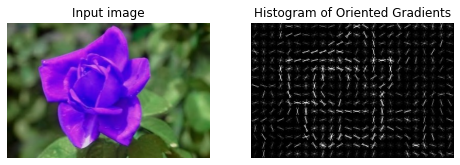

In [28]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

# ax1.axis('off')
# ax1.imshow(img, cmap=plt.cm.gray)
# ax1.set_title('Input image')

# # Rescale histogram for better display
# hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# ax2.axis('off')
# ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
# ax2.set_title('Histogram of Oriented Gradients')
# plt.show()